In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Activation, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [3]:
train = np.load('/content/drive/MyDrive/data/CompleteDataSet_training_tuples.npy', allow_pickle=True)
test = np.load('/content/drive/MyDrive/data/CompleteDataSet_testing_tuples.npy', allow_pickle=True)

In [4]:
train = pd.DataFrame(train, columns=['image', 'sign'])
test = pd.DataFrame(test, columns=['image', 'sign'])

X_train=np.stack(train['image'],0)
y_train=np.stack(train['sign'],0)

X_test=np.stack(test['image'],0)
y_test=np.stack(test['sign'],0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(200331, 28, 28) (200331,)
(66778, 28, 28) (66778,)


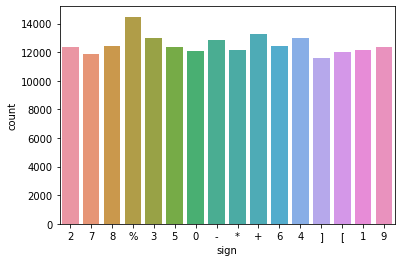

In [34]:
sns.countplot(data=train, x='sign')
#Data seems pretty balanced

In [5]:
#Make the target categorical before predicting
y_train_cats=pd.Categorical(y_train)
y_test_cats=pd.Categorical(y_test)
y_train=y_train_cats.codes
y_test=y_test_cats.codes

In [35]:
#Optimizer
opt = tf.keras.optimizers.Adam(lr=0.0001)
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

#Input
input=Input(shape=(28,28))
flatten_input = Flatten(input_shape=[28,28])(input)

#Hidden layers
hl_1=Dense(128,activation='relu')(flatten_input)
drop=Dropout(0.2)(hl_1) #Adding some dropout to lower the overfitting
hl_2=Dense(64,activation='relu')(drop)

#Output layer - softmax since we have multiple categories
output = Dense(16,activation='softmax')(hl_2)

#Set parameters for our model
epochs = 100
batch_size = 32
model = Model(inputs=input, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

#Start training
history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,callbacks=[es])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.9513 - accuracy: 0.7091 - val_loss: 0.5203 - val_accuracy: 0.8415
Epoch 2/100
5009/5009 [==============================] - 13s 3ms/step - loss: 0.5052 - accuracy: 0.8429 - val_loss: 0.3794 - val_accuracy: 0.8839
Epoch 3/100
5009/5009 [==============================] - 13s 3ms/step - loss: 0.3950 - accuracy: 0.8777 - val_loss: 0.3098 - val_accuracy: 0.9059
Epoch 4/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.3302 - accuracy: 0.8973 - val_loss: 0.2674 - val_accuracy: 0.9182
Epoch 5/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.2921 - accuracy: 0.9090 - val_loss: 0.2398 - val_accuracy: 0.9268
Epoch 6/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.2617 - accuracy: 0.9179 - val_loss: 0.2221 - val_accuracy: 0.9305
Epoch 7/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.2418 - accuracy: 0.9246 - val_loss: 0.2072 -

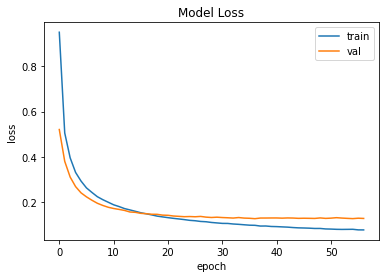

In [36]:
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show();

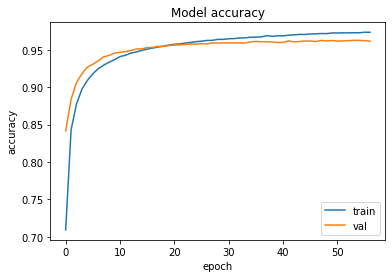

In [37]:
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show();

In [26]:
predictions=model.predict(X_test)

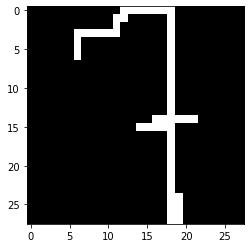

Prediction: 7


In [29]:
#lets check with an prediction
plt.imshow(X_test[9], cmap="gray")
plt.show()
print(f'Prediction: {y_test_cats.categories[np.argmax(predictions,axis=1)[9]]}')

In [30]:
print(classification_report(y_test, np.argmax(predictions,axis=1)))

cf = confusion_matrix(y_test, np.argmax(predictions,axis=1))
print(cf)
print(accuracy_score(y_test, np.argmax(predictions,axis=1)) * 100)

#As we can see our model performs very will on all the numbers/characters in the test data

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4924
           1       0.97      0.98      0.97      4110
           2       0.95      0.93      0.94      4387
           3       0.97      0.98      0.98      4188
           4       0.99      1.00      0.99      4167
           5       0.92      0.92      0.92      4103
           6       0.97      0.96      0.97      4021
           7       0.95      0.95      0.95      4372
           8       0.95      0.93      0.94      4349
           9       0.97      0.95      0.96      4159
          10       0.98      0.98      0.98      4078
          11       0.92      0.95      0.93      3999
          12       0.97      0.97      0.97      4133
          13       0.94      0.94      0.94      3961
          14       0.98      0.96      0.97      4126
          15       0.97      0.92      0.94      3701

    accuracy                           0.96     66778
   macro avg       0.96   